## Final Project Submission

Please fill out:
* Student name: Benson Kamau
* Student pace: full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita
* Blog post URL: N/A


In [344]:
# Your code here - remember to use markdown cells for comments as well!


Import python libraries for analysis:
1.Matplotlib and matplotlib inline to create visuals
2.Numpy to assist in visual creation
3.Seaborn to assist in visual creation
4.Sqlite3 to assist with sql-style syntax on panel dataframes
5.zipfile to assist with opening zipped packages
6.Pandas to read, manipulate and analyze data.



In [345]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sqlite3
import zipfile
from pandasql import sqldf 

Loading Datasets

In [346]:
bom_movie = pd.read_csv('bom.movie_gross.csv')
bom_movie.head(10)



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [347]:
#check the data info
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [348]:
#check for missing data 
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Lets try getting the Return on investment(ROI), we will load our budget data before analysing.

In [349]:
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [350]:
#making movie title as index
budgets1 = budgets.set_index("movie")
budgets1.head(10)


,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015","$306,000,000","$936,662,225","$2,053,311,220"
Avengers: Infinity War,7,"Apr 27, 2018","$300,000,000","$678,815,482","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007","$300,000,000","$309,420,425","$963,420,425"
Justice League,9,"Nov 17, 2017","$300,000,000","$229,024,295","$655,945,209"


In [351]:
# get the structure of budgets1(column names and the data types)
budgets1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


We need to convert the dataframe to numeric values that allows us to do mathematical computations. We will also need to replace the $ and , in our data.

In [352]:
# Convert the production_budget,domestic_gross and worldwide_gross columns to numeric type
budgets1['domestic_gross'] = budgets1['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1['worldwide_gross'] = budgets1['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1['production_budget'] = budgets1['production_budget'].str.replace('$', '').str.replace(',', '').astype('int64')
budgets1.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747


In [353]:
# Calculate the net profit and profit margin for each movie
budgets1['net_profit'] = budgets1['worldwide_gross'] - budgets1['production_budget']
budgets1['profit_margin'] = round(budgets1['net_profit'] / budgets1['worldwide_gross'], 4)
budgets1['ROI'] = round(((budgets1['domestic_gross'] + budgets1['worldwide_gross']) - budgets1['production_budget']) / budgets1['production_budget'] , 2)

In [354]:
#Print the results
budgets1.head(10)

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin,ROI
movie,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469,7.32
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875,635063875,0.6073,2.13
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350,-200237650,-1.3370,-0.45
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,1072413963,0.7644,4.63
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747,999721747,0.7593,5.11
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510,8.77
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535,8.09
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007",300000000,309420425,963420425,663420425,0.6886,3.24
Justice League,9,"Nov 17, 2017",300000000,229024295,655945209,355945209,0.5426,1.95


In [355]:
# replace the negative infinity values with Not a Number
budgets1.profit_margin.replace(-np.inf, np.nan, inplace=True)
budgets1.dropna(inplace=True)
budgets1.reset_index()
budgets1.head(10) 

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin,ROI
movie,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469,7.32
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875,635063875,0.6073,2.13
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350,-200237650,-1.3370,-0.45
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963,1072413963,0.7644,4.63
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747,999721747,0.7593,5.11
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510,8.77
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535,8.09
Pirates of the Caribbean: At Worldâs End,8,"May 24, 2007",300000000,309420425,963420425,663420425,0.6886,3.24
Justice League,9,"Nov 17, 2017",300000000,229024295,655945209,355945209,0.5426,1.95


In [356]:
sorted_movies = budgets1.sort_values(by = 'net_profit', ascending=False)
sorted_movies.reset_index
sorted_movies.head(20) 

,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin,ROI
movie,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,2351345279,0.8469,7.32
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,2008208395,0.9094,13.34
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,1748134200,0.8535,8.09
Star Wars Ep. VII: The Force Awakens,6,"Dec 18, 2015",306000000,936662225,2053311220,1747311220,0.8510,8.77
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,0.8696,9.70
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,1328722794,0.8749,8.85
The Avengers,27,"May 4, 2012",225000000,623279547,1517935897,1292935897,0.8518,8.52
Harry Potter and the Deathly Hallows: Part II,61,"Jul 15, 2011",125000000,381193157,1341693157,1216693157,0.9068,12.78
Black Panther,42,"Feb 16, 2018",200000000,700059566,1348258224,1148258224,0.8517,9.24


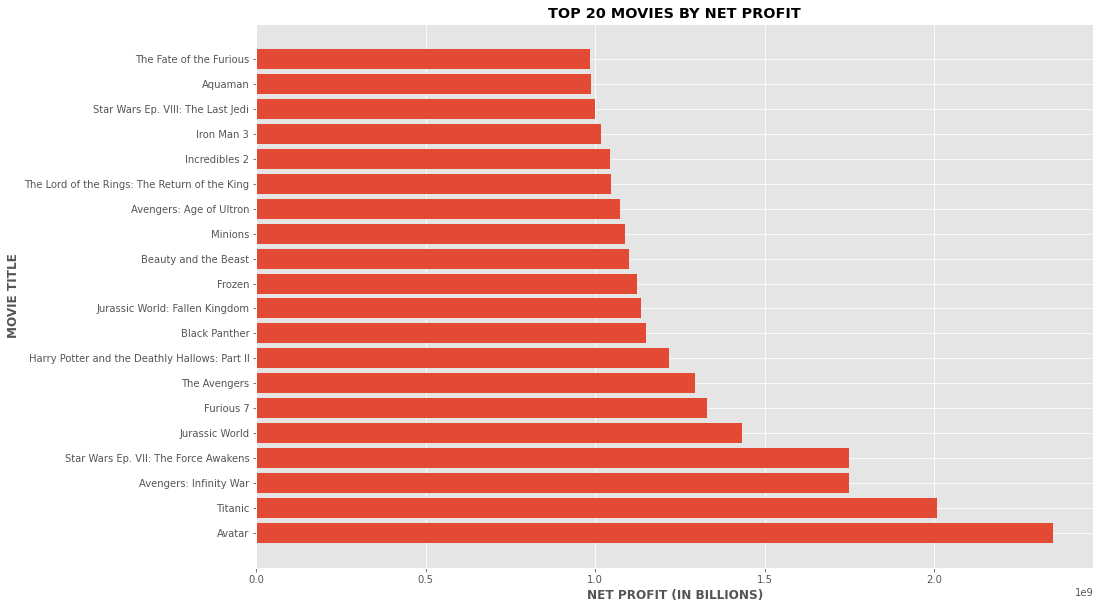

In [357]:
# Create bar chart of top 20 movies by net profit
plt.figure(figsize=(15, 10))
plt.barh(sorted_movies.index[:20], sorted_movies['net_profit'][:20])
plt.title('Top 20 Movies by Net Profit'.upper(), fontweight='bold')
plt.xlabel('Net Profit (in billions)'.upper(), fontweight='bold')
plt.ylabel('Movie Title'.upper(), fontweight='bold')
plt.show()

Avatar,Titanit and Avengers were the top three movies that did well. Let's investigate why they did well? Is there are correlation of the investment to the profit?

In [358]:
# calculate the Pearson correlation coefficient between budget and net profit
movie_budget = budgets1['production_budget']
net_profit = budgets1['net_profit']
corr = np.corrcoef(movie_budget, net_profit)[0, 1] 


In [359]:
# print the correlation coefficient
print('The Pearson correlation coefficient between budget and net profit is:', corr)


The Pearson correlation coefficient between budget and net profit is: 0.6068652923681526


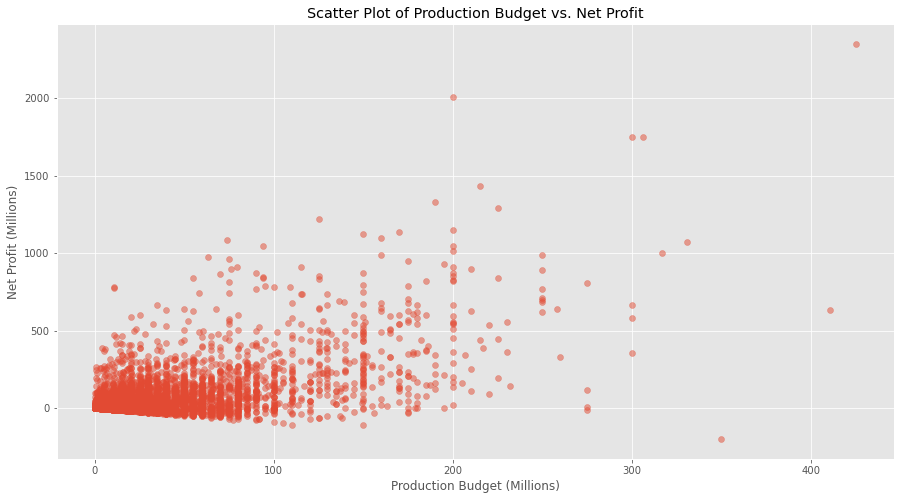

In [360]:
plt.figure(figsize=(15, 8))
plt.scatter(x=budgets1['production_budget']/1000000, y=budgets1['net_profit']/1000000, alpha=0.5)
plt.xlabel('Production Budget (Millions)')
plt.ylabel('Net Profit (Millions)')
plt.title('Scatter Plot of Production Budget vs. Net Profit')
plt.show() 



A Pearson correlation coefficient of 0.61 suggests a somewhat good relationship between the production budget and net profits. This indicates that when the manufacturing budget increases, so does net profit. However, correlation does not imply causation, thus we cannot state with certainty that raising the production budget will always result in a higher net profit.However, by analyzing the profit margins of successful films, we can establish the profit margin to aim for. This is accomplished by assessing the profit margin for movies that have made a profit and comparing it to the general median profit margin as well as the median profit margin for the top 20 movies with the highest net profit. 

Lets load the data base file 

In [361]:
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

In [362]:
#open up a connection
conn = sqlite3.connect('zippedData/im.db')
#initialize connection
cursor = conn.cursor()

In [363]:
# Get the tables in the data base file
df1 =pd.read_sql( """
SELECT name 
FROM sqlite_master 
WHERE type ='table' AND name NOT LIKE 'sqlite_%';
""", conn)

df1

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [364]:
#previewing movie_ratings table
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [365]:
#previewing movie_basics table
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [366]:
#previewing the persons table
q3 = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
q3.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [367]:
#previewing the directors table
q = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
q.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Merge movie_basics, persons, directors and movie_ratings


In [368]:
df2 = pd.read_sql ("""
SELECT *
       FROM movie_basics AS mb
       JOIN movie_ratings AS mr
       USING (movie_id)
      
;""",conn)
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [369]:
# getting info about df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [370]:
df2.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Handling the missing data for the runtime_minutes and genres tables.

In [371]:
median_runtime = df2['runtime_minutes'].median()
df2['runtime_minutes'].fillna(median_runtime, inplace=True)

# Replace NaNs in 'genres' column with a placeholder string
df2['genres'].fillna('Unknown', inplace=True)

In [372]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [373]:
# check the number of duplicates in the dataset
df2.duplicated(subset='original_title').sum()

2759

In [374]:
#check if there movies with the same name, runtime and start_year.
df2[
    df2.duplicated(
        subset=['original_title',
                'runtime_minutes', 
                'start_year'
               ]
    )
]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
804,tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47
6257,tt1644694,The Gift,The Gift,2010,91.0,"Animation,Drama",5.9,7
7082,tt1674217,Transit,Transit,2010,80.0,"Biography,Documentary,Family",6.7,13
11281,tt1825978,The Artist,The Artist,2011,100.0,Thriller,6.8,6
14390,tt1967651,Unconditional Love,Unconditional,2012,92.0,"Drama,Thriller",5.6,660
14540,tt1977822,Inside,Inside,2012,85.0,Horror,4.0,397
20468,tt2246595,Blood Money,Blood Money,2012,109.0,"Action,Drama,Thriller",5.2,881
23196,tt2363471,The Summit,The Summit,2012,95.0,"Adventure,Documentary",6.9,4147
29071,tt2805202,Rise of the Undead,Rise of the Undead,2013,70.0,Action,4.2,20
31204,tt3019098,The Last Act,The Last Act,2012,91.0,Thriller,5.7,6


We should delete the duplicates, but we should keep the version with the higher vote count, as it's the version that IMDb users will more likely come across.

In [375]:
#sorting the dataset by numvotes
df2.sort_values(by='numvotes',ascending=False, 
    inplace=True
)
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
53263,tt5330830,Ann,Ann,2016,79.0,Drama,8.6,5
62310,tt6538150,The Whale Caller,The Whale Caller,2016,94.0,Drama,7.4,5
12881,tt1886495,Choctaw Code Talkers,Choctaw Code Talkers,2010,56.0,Documentary,8.8,5
6789,tt1666158,Crime,Crime,2010,70.0,Thriller,4.2,5


In [376]:
#dropping the duplicates
df2.drop_duplicates(
    subset=[
        'original_title', 
        'runtime_minutes', 
        'start_year'
    ], 
    inplace=True, 
    keep='first'
)

In [377]:
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


Checking for outliers in the runtime_minutes where a movie has 51,420 minutes. 

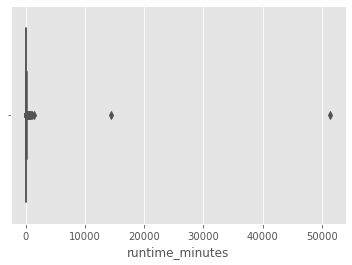

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(data=df2, x='runtime_minutes')

# Save the boxplot as a PNG image
plt.savefig('boxplot.png')

In [379]:
#dropping the outliers
df2 = df2.loc[(df2.runtime_minutes <= 200) & (df2.runtime_minutes >= 30)]

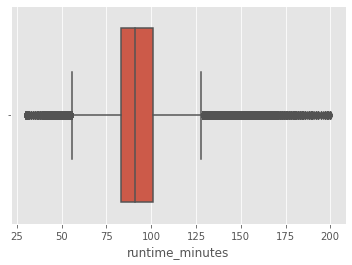

In [380]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(data=df2, x='runtime_minutes')

# Save the boxplot as a PNG file
plt.savefig('boxplot.png')

# Show the plot
plt.show()

Dealing with genres column
The values in the genres column contain multiple genres separated by a comma. We need to split them up them.

In [381]:
# Splitting genres into separate rows
df2_genres_split = df2['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Concatenating the split genres with the original DataFrame
df3 = df2.drop('genres', axis=1).join(df2_genres_split)

print(df3.head())

    movie_id                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   
1  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes  averagerating  numvotes      genre  
0            175.0            7.0        77     Action  
0            175.0            7.0        77      Crime  
0            175.0            7.0        77      Drama  
1            114.0            7.2        43  Biography  
1            114.0            7.2        43      Drama  


In [382]:
genre_votes = df3.groupby('genre')['numvotes'].sum().reset_index()

print(genre_votes)

          genre   numvotes
0        Action  101088360
1         Adult        164
2     Adventure   84232168
3     Animation   15353065
4     Biography   21579559
5        Comedy   74235342
6         Crime   39541689
7   Documentary    4677784
8         Drama  119551544
9        Family    8636488
10      Fantasy   26335312
11    Game-Show       3469
12      History    7835980
13       Horror   23884451
14        Music    5442463
15      Musical    1387604
16      Mystery   24654325
17         News     123199
18   Reality-TV        459
19      Romance   26910477
20       Sci-Fi   42960211
21        Sport    3755626
22     Thriller   48150535
23      Unknown      19729
24          War    2684708
25      Western    2452317


In [383]:
df3.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,Drama


Dropping the genres with the lowest counts.

In [384]:
# Gathering together the 'movie_id' for each entry in these four genres.

movies_in_lowestcount_genres = (
   df3[df3['genre'].isin([
        'Game-Show', 'Short', 'Adult','Reality-TV'
    ])]['movie_id']
)

In [385]:
# Drop  movies with a movie_id listed any of the four genres that have the lowest count.
for dataset in [df2, df3]:
    dataset.drop(
        index=dataset[
            dataset['movie_id'].isin(movies_in_lowestcount_genres)
        ].index, 
        inplace=True)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [386]:
# Confirming that the above worked

df3['genre'].value_counts()

Drama          30703
Documentary    17453
Comedy         17260
Thriller        8206
Horror          7665
Action          6972
Romance         6580
Crime           4601
Adventure       3797
Biography       3760
Family          3399
Mystery         3035
History         2794
Sci-Fi          2201
Fantasy         2120
Music           1953
Animation       1732
Sport           1166
War              851
Unknown          802
Musical          715
News             571
Western          278
Name: genre, dtype: int64

In [387]:
#creating a new column that categorises the average rating into high, average and low
df3['rating'] = ["High" if ((x >= 6) and (x <= 10)) 
                   else "Low" for x in df3.averagerating]

In [388]:
#sorting the dataframe by number of votes
df3.sort_values('numvotes', ascending = False, inplace = True)

In [389]:
#creating a dataframe where number of votes are greater than 1000
imdb1 = df3.loc[df3.numvotes > 1000]


In [390]:
#grouping data by genre and rating
genres1 = imdb1.groupby(['genre','rating'])['movie_id'].count()

In [391]:
#sorting the dataframe by high ratings
genres1 = genres1.unstack().sort_values('High',ascending = False)[:10]

In [392]:
#setting the plot style
plt.style.use('ggplot')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Romance'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Documentary'),
  Text(7, 0, 'Adventure'),
  Text(8, 0, 'Biography'),
  Text(9, 0, 'Mystery')])

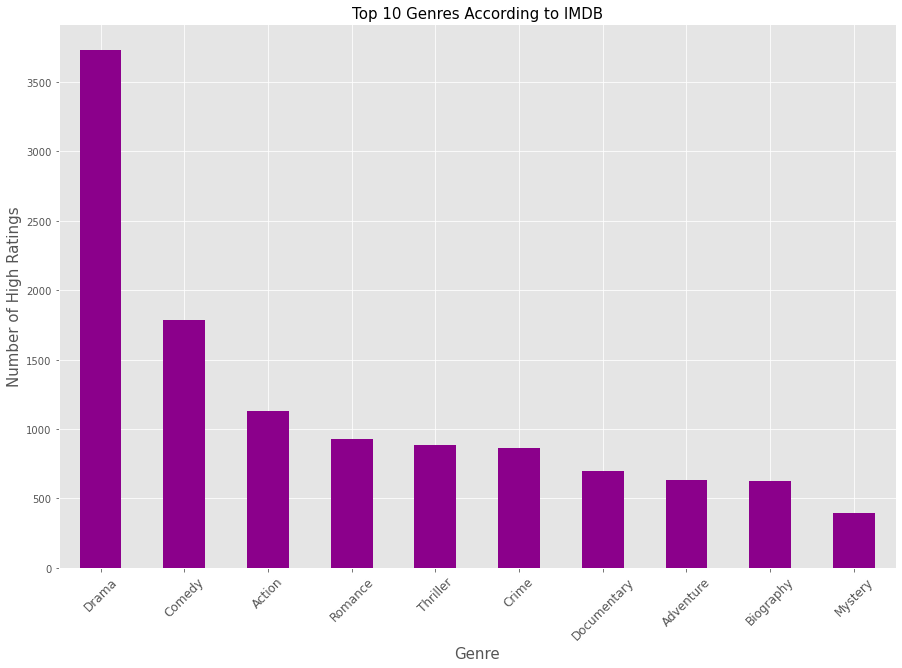

In [393]:
import os
import matplotlib.pyplot as plt

# Create the directory if it doesn't exist
os.makedirs('Images', exist_ok=True)

# Plotting a bar graph of most popular genres
fig, ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to IMDB'
y_label = 'Number of High Ratings'
x_label = 'Genre'

genres1.High.plot(kind='bar', color='DarkMagenta')  # Set the color to purple
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45, fontsize=12)


Drama emerges as the most popular genre, closely followed by comedy.
Additionally, action, adventure, and romance movies also enjoy significant popularity.

Reading the reviews TSV file

In [394]:
reviews = pd.read_csv('rt.reviews.tsv',sep="\t", encoding = 'unicode_escape')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [395]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Checking for duplicates in reviews

In [396]:
reviews.drop_duplicates(inplace = True)

In [397]:
movie_info = pd.read_csv('rt.movie_info.tsv',sep="\t", encoding = 'unicode_escape')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [398]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [399]:
#dropping columns with are not required
movie_info.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

#dropping rows with null values
movie_info.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [400]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1526 non-null   int64 
 1   rating   1526 non-null   object
 2   genre    1526 non-null   object
 3   runtime  1526 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


In [401]:
#split the genre
movie_info = movie_info.assign(genre=movie_info.genre.str.split('|')).explode('genre')
movie_info.head()

,id,rating,genre,runtime
0,1,R,Action and Adventure,104 minutes
0,1,R,Classics,104 minutes
0,1,R,Drama,104 minutes
1,3,R,Drama,108 minutes
1,3,R,Science Fiction and Fantasy,108 minutes


The "runtime" column is currently in string format, with the word "minutes" included. This text will be removed, and the column will be converted to integer format.

In [402]:
#removing minutes
movie_info.runtime = movie_info.runtime.str.replace('minutes',"")

#converting to integer
movie_info.runtime = movie_info.runtime.astype('int')

In [403]:
movie_review = reviews.merge(movie_info, how = 'inner',on = 'id')
movie_review.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108
1,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108
2,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama,108
3,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Science Fiction and Fantasy,108
4,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama,108


Popular categories based on Rotten Tomatoes rating system, distinguishing between "fresh" and "rotten" ratings.

In [404]:
#grouping movie_review by genre and fresh (rating)
rt_genres = movie_review.groupby(['genre','fresh']).count()['id'].unstack()

#getting top 10 genres
rt_genres = rt_genres.sort_values('fresh',ascending = False)[:10]

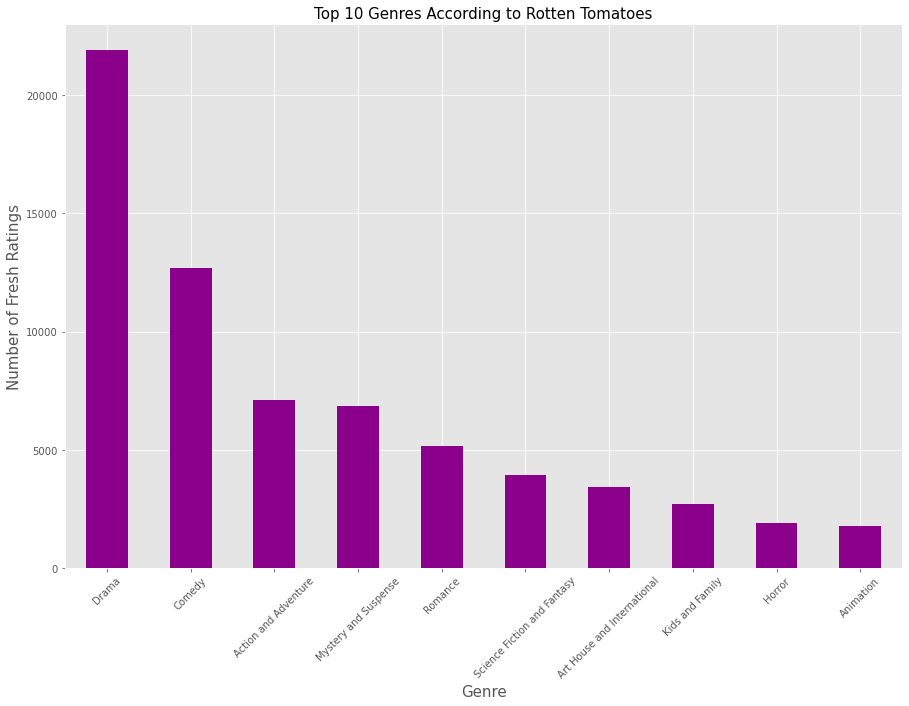

In [405]:
import matplotlib.pyplot as plt

# Plotting a bar graph of most popular genres according to Rotten Tomatoes
fig, ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to Rotten Tomatoes'
y_label = 'Number of Fresh Ratings'
x_label = 'Genre'

rt_genres.fresh.plot(kind='bar', color='DarkMagenta')  # Set the color to purple
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('rt_genres_barplot.png')

plt.show()

Drama emerges as the most popular genre, closely followed by comedy.
Additionally, action, adventure, and romance movies also enjoy significant popularity.

Film Ratings of Most Watched Movies

In [425]:
#grouping movie_review by rating and fresh rating system
rt_ratings = movie_review.groupby(['rating_y','fresh'])['id'].count().unstack()

#sorting values by fresh rating
rt_ratings = rt_ratings.sort_values('fresh',ascending = False)

rt_ratings.head()

fresh,fresh,rotten
rating_y,,
R,32405,17425
PG-13,19464,18214
PG,13759,7317
NR,4933,1226
G,2655,814


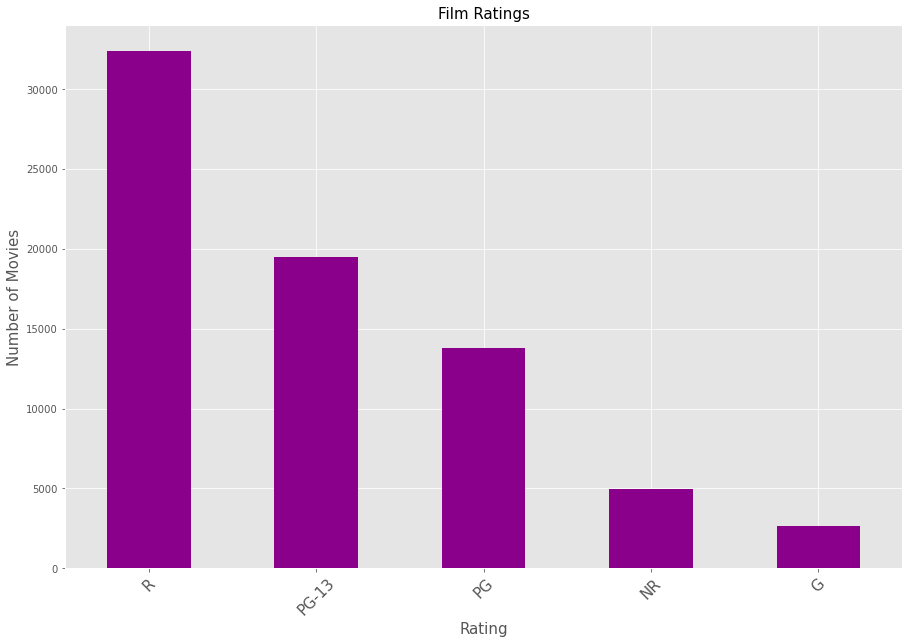

In [426]:
import matplotlib.pyplot as plt

# Plotting a bar graph of the ratings
fig, ax = plt.subplots(figsize=(15,10))

title = 'Film Ratings'
y_label = 'Number of Movies'
x_label = 'Rating'

rt_ratings.fresh.plot(kind='bar', color='DarkMagenta')  # Set the color to purple
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45, fontsize=15)
fig.savefig('Images/ratings.png')

The R-rated movies top this list. G-rated movies are the least popular.

In [406]:
df3_mean = df3.groupby('genre', as_index=False).mean()
df3_mean.head()

,genre,start_year,runtime_minutes,averagerating,numvotes
0,Action,2014.285427,102.506885,5.809911,14499.185886
1,Adventure,2014.308401,93.613379,6.191941,22183.860679
2,Animation,2014.372979,86.034065,6.242725,8864.356236
3,Biography,2013.977128,90.958511,7.158484,5739.241755
4,Comedy,2014.252781,96.473928,6.001304,4301.001043


In [407]:
pivot_genres = pd.pivot_table(
    data=df3,
    values=['numvotes'],
    index='genre',
    aggfunc=np.mean
).sort_values(by='numvotes', ascending=False).reset_index()
pivot_genres['numvotes'] = pivot_genres['numvotes'].astype(int) 
print(pivot_genres)

          genre  numvotes
0     Adventure     22183
1        Sci-Fi     19518
2        Action     14499
3       Fantasy     12422
4     Animation      8864
5       Western      8821
6         Crime      8594
7       Mystery      8123
8      Thriller      5867
9     Biography      5739
10       Comedy      4301
11      Romance      4089
12        Drama      3893
13        Sport      3220
14          War      3154
15       Horror      3116
16      History      2804
17        Music      2786
18       Family      2540
19      Musical      1940
20  Documentary       268
21         News       215
22      Unknown        24


[Text(0.5, 0, 'Average number of votes on IMDb'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Average vote count on movies by genre \n (Top 10% of movies)')]

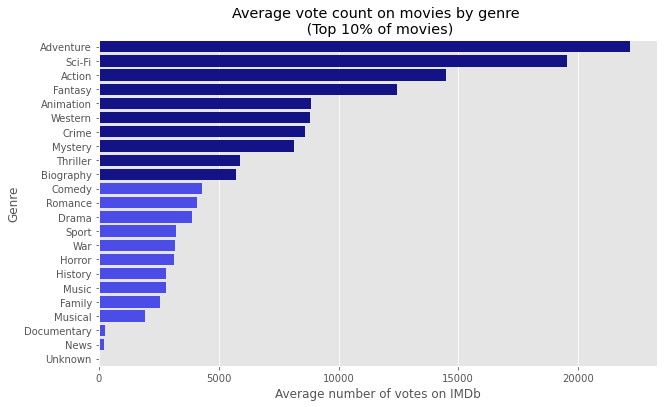

In [408]:
values = pivot_genres['numvotes']
labels = pivot_genres['genre']

plt.figure(figsize=(10, 6))
genres_barplot = sns.barplot(
    x=values,
    y=labels,
    orient='h',
#     palette='crest_r'
    palette=['#000099' if (x > values[10]) else '#3333ff' for x in values]
    )

genres_barplot.set(
    xlabel='Average number of votes on IMDb',
    ylabel='Genre',
    title ='Average vote count on movies by genre \n (Top 10% of movies)'
    )


The top 10 genres in terms of average number of votes on IMDb are:

Adventure
Sci-Fi
Action
Fantasy
Animation
Western
Crime
Mystery
Thriller
Biography


In [409]:
df3 = df3.rename(columns={'primary_title': 'movie'})
df3.head()

,movie_id,movie,original_title,start_year,runtime_minutes,averagerating,numvotes,genre,rating
2387,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Action,High
2387,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Sci-Fi,High
2387,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Adventure,High
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,8.4,1387769,Thriller,High
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,8.4,1387769,Action,High


Merging budgets1 dataset from the 'tn.movie_budgets.csv' and dataset from the 'im.db'

In [410]:
merged_df4 = pd.merge(df3, budgets1, on='movie', how ='inner')
merged_df4.head()

,movie_id,movie,original_title,start_year,runtime_minutes,averagerating,numvotes,genre,rating,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin,ROI
0,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Action,High,38,"Jul 16, 2010",160000000,292576195,835524642,675524642,0.8085,6.05
1,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Sci-Fi,High,38,"Jul 16, 2010",160000000,292576195,835524642,675524642,0.8085,6.05
2,tt1375666,Inception,Inception,2010,148.0,8.8,1841066,Adventure,High,38,"Jul 16, 2010",160000000,292576195,835524642,675524642,0.8085,6.05
3,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,8.4,1387769,Thriller,High,11,"Jul 20, 2012",275000000,448139099,1084439099,809439099,0.7464,4.57
4,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,8.4,1387769,Action,High,11,"Jul 20, 2012",275000000,448139099,1084439099,809439099,0.7464,4.57


In [411]:
#check the number of  missing data
merged_df4.isna().sum()

movie_id             0
movie                0
original_title       0
start_year           0
runtime_minutes      0
averagerating        0
numvotes             0
genre                0
rating               0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
net_profit           0
profit_margin        0
ROI                  0
dtype: int64

In [412]:
#convert the release dates into a suitable datetime format for analysis
merged_df4['release_date'] = pd.to_datetime(merged_df4['release_date'])

<Figure size 1152x720 with 0 Axes>

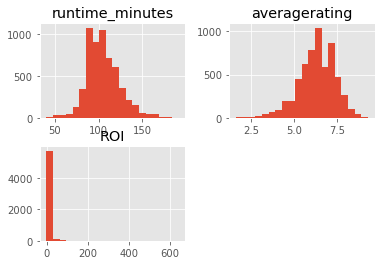

In [413]:
#Visualize the distribution of runtime, ratings, and ROI using histograms
plt.figure(figsize=(16, 10))  # Adjust the size as needed
merged_df4[['runtime_minutes', 'averagerating', 'ROI']].hist(bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Runtime Minutes, Average Rating, and ROI')
plt.show()

In [414]:
#Check for correlations between variables:
merged_df4[['runtime_minutes', 'averagerating', 'ROI']].corr()

,runtime_minutes,averagerating,ROI
runtime_minutes,1.000000,0.237528,-0.048345
averagerating,0.237528,1.000000,-0.010510
ROI,-0.048345,-0.010510,1.000000


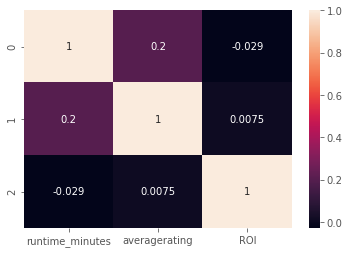

In [415]:

#Visualize the Above data
# create a dataframe with the correlation values
data = {'runtime_minutes': [1.000000, 0.203768, -0.028707],
        'averagerating': [0.203768, 1.000000, 0.007536],
        'ROI': [-0.028707, 0.007536, 1.000000]}
df = pd.DataFrame(data)

# create a heatmap using seaborn
sns.heatmap(df, annot=True)

# display the plot
plt.show()

In summary, based on these correlation results:

1. There is a weak positive relationship between runtime minutes and average rating.
2. There is little to no association between either runtime minutes or average rating and return on investment (ROI).

Lets group the dataset by movie and calculate mean rating and ROI

In [416]:
#Group by movie and calculate the mean rating and ROI
merged_df4.groupby('movie')[['averagerating', 'ROI']].mean()

,averagerating,ROI
movie,,
10 Cloverfield Lane,7.200000,35.07
10 Days in a Madhouse,6.700000,-1.00
12 Rounds,8.100000,0.48
12 Strong,6.600000,2.34
12 Years a Slave,8.100000,10.88
...,...,...
Zoolander 2,4.700000,0.68
Zoom,6.471429,-0.30
Zootopia,8.000000,8.07


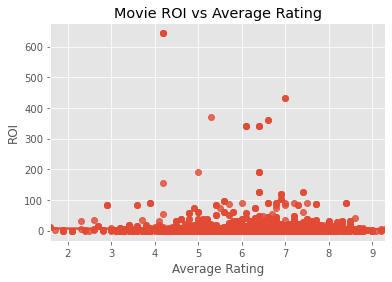

In [417]:
# create a scatter plot to visualize the correlation between Mean ROI and  averagerating 

sns.regplot(x='averagerating', y='ROI', data=merged_df4)

# set plot labels and title
plt.xlabel('Average Rating')
plt.ylabel('ROI')
plt.title('Movie ROI vs Average Rating')

# display the plot
plt.show()


In [418]:

#top 10 ROI
top10_movies = merged_df4.groupby('movie')['ROI'].mean().nlargest(10)
top10_movies_df = top10_movies.reset_index().rename(columns={'movie': 'Movie', 'ROI': 'Mean ROI'})
print(top10_movies_df)

                      Movie    Mean ROI
0               The Gallows  643.210000
1                     Bambi  431.160000
2                     Rocky  341.240000
3            Graduation Day  190.150000
4  Night of the Living Dead  185.365000
5          The Devil Inside  154.020000
6                 Halloween  135.823333
7                     Benji  125.240000
8                 Insidious  101.590000
9                Unfriended   96.150000


Visualization for the movies grouped by the mean of the ROI.

Text(0.5, 1.0, 'Mean ROI for Top 10 Movies')

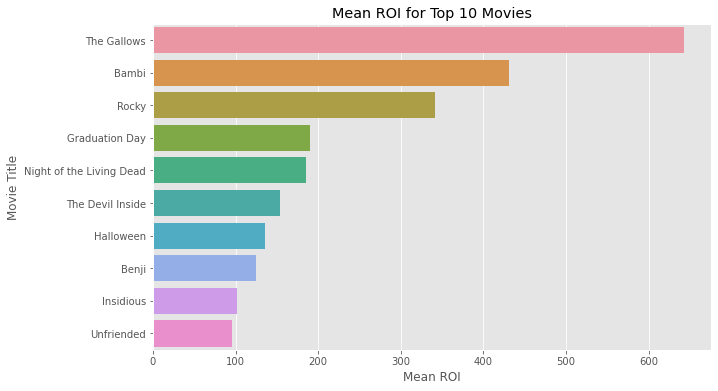

In [419]:
plt.figure(figsize=(10, 6))

# Create horizontal bar plot using Seaborn
sns.barplot(x='Mean ROI', y='Movie', data=top10_movies_df)

# Set plot labels and title
plt.xlabel('Mean ROI')
plt.ylabel('Movie Title')
plt.title('Mean ROI for Top 10 Movies')



In [420]:
##top 10 rated movies
top10_ratings = merged_df4.groupby('movie')['averagerating'].mean().nlargest(10)
top10_ratings_df = top10_ratings.reset_index().rename(columns={'movie': 'Movie', 'averagerating': 'Averageratings'})
print(top10_ratings_df)

                 Movie  Averageratings
0          Richard III             9.1
1              Frailty             9.0
2            Inception             8.8
3  Message in a Bottle             8.8
4          Serendipity             8.8
5                Teeth             8.8
6             Snow Day             8.7
7             The Rock             8.7
8                  Yes             8.7
9       Butterfly Girl             8.6


Text(0.5, 1.0, 'Average movie rating for Top 10 Movies')

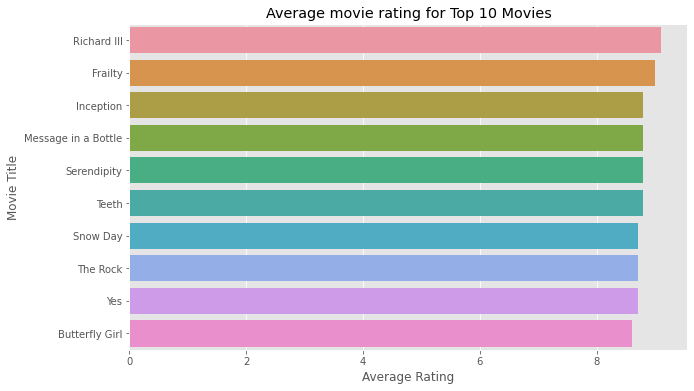

In [421]:
plt.figure(figsize=(10, 6))

# Create horizontal bar plot using Seaborn
sns.barplot(x='Averageratings', y='Movie', data=top10_ratings_df)

# Set plot labels and title
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Average movie rating for Top 10 Movies')
